## Sophie Frank Data Bootcamp Research Project
### Predicters of loan returns in women's microfinance
### Raw Data from Madura Micorfinance Data Team Winter 2016
### Spring 2017

This project uses data acquired from a contact at Madura microfinance in India. I was particularly interest in exploring this topic because I think that microfinance is one of the most important keys to economic development, particularly in India. Mohammad Yunus conceived of the concept for microfinance in Bangladesh. The concept is centered around a group of women offering joint collateral for small-scale loans so they are able to run businesses. This data set includes 997 randomly selected memebers. I hypothesized that women with greater access to education would be more likely to successfully return their loan. This data set indicated that members are either "in arrears" or have a "regular" return status. I altered these to be indicated by a zero when a member is in arrears and a 1 when the member is regular. I created several descriptive graphs with the data and ran a logistic regression to see how different factors predict return status.

In [274]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dnt
import statistics as stats
import seaborn as sns
sns.set(style="whitegrid", color_codes=True) 




In [275]:
# read the data in
df = pd.read_excel("/Users/Sophie/Dropbox/Senior_Year/Honors/Research/Data/Madura_Raw_Data.xlsx")

df.head()

,Member_Id,Id _2,name_2,Id _3,name_3,Id _4,name_4,Pop_2011,Pop_2001,NoHshlds,...,Latitude,Longitude,Years residing at the above address,Age,Count of phone no,Current Residence Status - Own property Or Leased/Rented Property,Household Annual income,Education Details of Self,Education Details of Father,Default Status
0,1,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,50,1,2,NaN,2,0,Arrear
1,2,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,42,1,2,NaN,3,0,Arrear
2,3,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,26,1,2,NaN,2,0,Arrear
3,4,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,26,1,2,NaN,4,0,Arrear
4,5,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,26,1,2,NaN,2,0,Arrear


In [276]:
df.shape

(997, 84)

In [295]:
df = df.rename(index=str, columns={"Member_Id": "Member ID", "Id _2": "Region ID", "name_2": "Region", 
                              "Id _3": "District ID", "name_3": 
                             "District", "Id _4": "Village ID", "name_4": "Village", 
                             "Pop_2011": "Village Population 2011", "Pop_2001": "Village Population 2001",
                             "NoHshlds": "Number of Households in Village", "literacy_rate": "literacy rate in village",
                             "Agri_ratio": "Percent of Business in Agriculture in Vilalge", 
                             "Distance to Tertiary Road (Km)": "Km between village and closest tertiary road",
                             "Bank Branches 10Km": "Private Bank Branches Within 10Km of Village",
                             "Age": "Age of Member", "Education Details of Self": "Number of Years of Education for Member",
                             "Education Details of Father": "Number of Years of Education for Member's Father",
                             "Default Status": "Default Status of Member Loans at Madura"})

In [296]:
df.head()


,Member ID,Region ID,Region,District ID,District,Village ID,Village,Village Population 2011,Village Population 2001,Number of Households in Village,...,Latitude,Longitude,Years residing at the above address,Age of Member,Count of phone no,Current Residence Status - Own property Or Leased/Rented Property,Household Annual income,Number of Years of Education for Member,Number of Years of Education for Member's Father,Default Status of Member Loans at Madura
0,1,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,50,1,2,NaN,2,0,Arrear
1,2,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,42,1,2,NaN,3,0,Arrear
2,3,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,26,1,2,NaN,2,0,Arrear
3,4,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,26,1,2,NaN,4,0,Arrear
4,5,608,Salem,5743,Attur,634290,Sadasivapuram,3430,3108.0,912,...,11.57598,78.67694,3.0,26,1,2,NaN,2,0,Arrear


In [297]:
df_1 = df[['Member ID', 'Village Population 2011',
                             'literacy rate in village',
                             'Percent of Business in Agriculture in Vilalge', 
                             'Km between village and closest tertiary road',
                             'Private Bank Branches Within 10Km of Village', 'Age of Member', 
                             'Number of Years of Education for Member',
                             "Number of Years of Education for Member's Father",
                             'Default Status of Member Loans at Madura']]
df_1 = df_1.replace(['Arrear', 'Regular'], [0, 1])

In [298]:
df_1.head()

,Member ID,Village Population 2011,literacy rate in village,Percent of Business in Agriculture in Vilalge,Km between village and closest tertiary road,Private Bank Branches Within 10Km of Village,Age of Member,Number of Years of Education for Member,Number of Years of Education for Member's Father,Default Status of Member Loans at Madura
0,1,3430,74,0.81,7.05,23,50,2,0,0
1,2,3430,74,0.81,7.05,23,42,3,0,0
2,3,3430,74,0.81,7.05,23,26,2,0,0
3,4,3430,74,0.81,7.05,23,26,4,0,0
4,5,3430,74,0.81,7.05,23,26,2,0,0


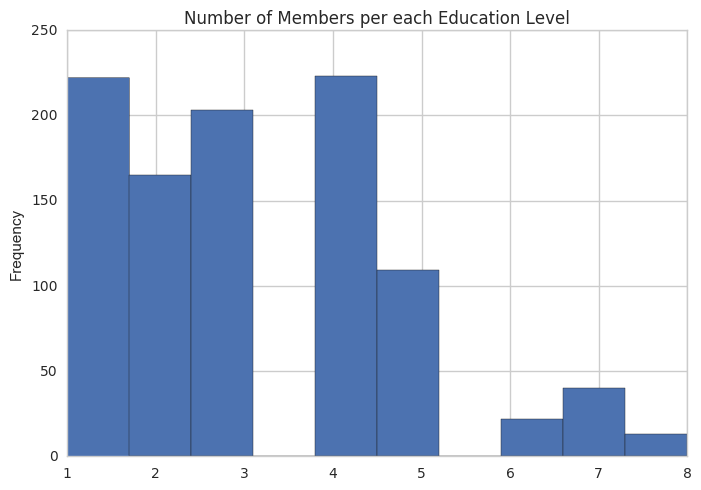

In [299]:
fig, ax = plt.subplots()
df_1['Number of Years of Education for Member'].plot(ax=ax, kind='hist', title = 'Number of Members per each Education Level') 


It is easy to observe that most members have less than five years of formal schooling.

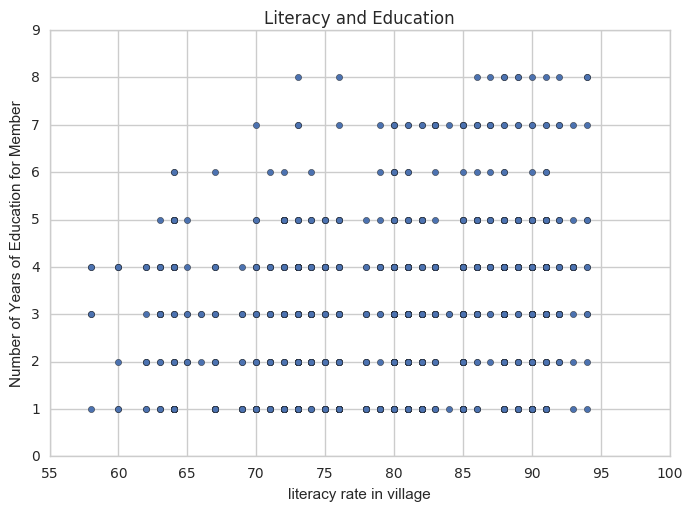

In [303]:
df_1.plot('literacy rate in village', 'Number of Years of Education for Member', kind='scatter', 
                                                     title = 'Literacy and Education')


This graph does not offer any useful information because there are no true cluster patterns, indicating there is little to no relationship between the overall literacy rate of the village and the member's education.

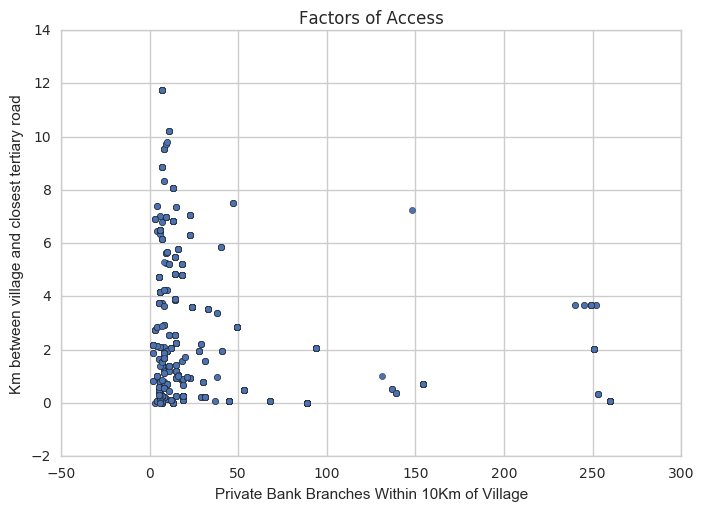

In [304]:
df_1.plot('Private Bank Branches Within 10Km of Village', 'Km between village and closest tertiary road', kind='scatter', 
                                                     title = 'Factors of Access')

The majority of members have few, if any banks near by, but there is seemingly no relationship between the ditance to the closest tertiary road and the number of bank branches near the village. There seem to be many data points on the lower end of each scale, however.

In [282]:
df_1.describe()

,Member ID,Village Population 2011,literacy rate in village,Percent of Business in Agriculture in Vilalge,Km between village and closest tertiary road,Private Bank Branches Within 10Km of Village,Age of Member,Number of Years of Education for Member,Number of Years of Education for Member's Father,Default Status of Member Loans at Madura
count,997.000000,9.970000e+02,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,499.000000,7.582116e+04,80.064193,0.352728,2.366098,37.278837,36.795386,3.123370,0.543631,0.936810
std,287.953411,1.988713e+05,8.601502,0.283688,2.628567,61.188369,7.878486,1.694494,1.093680,0.243426
min,1.000000,1.240000e+02,58.000000,0.010000,0.010000,2.000000,20.000000,1.000000,0.000000,0.000000
25%,250.000000,3.549000e+03,73.000000,0.080000,0.280000,7.000000,30.000000,2.000000,0.000000,1.000000
50%,499.000000,8.774000e+03,81.000000,0.330000,1.390000,13.000000,36.000000,3.000000,0.000000,1.000000
75%,748.000000,2.546900e+04,88.000000,0.610000,3.740000,31.000000,42.000000,4.000000,1.000000,1.000000
max,997.000000,1.017865e+06,94.000000,0.980000,11.740000,260.000000,64.000000,8.000000,7.000000,1.000000


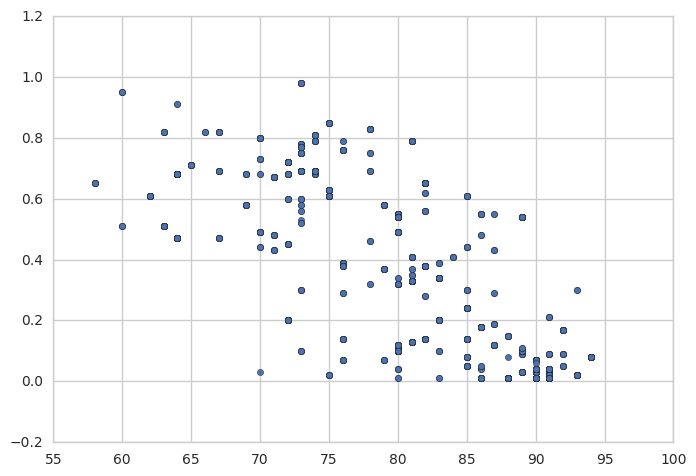

In [283]:
# relationship between literacy rate and agricultural business

mydata = df_1[["literacy rate in village", "Percent of Business in Agriculture in Vilalge"]].dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1])


I wanted to see if there is any apparent correlation in a scatterplot between the emphasis on agriculture in a community and the literacy rate of that area. There does not appear to be much of a relationship.

In [286]:
df_1.head()

,Member ID,Village Population 2011,literacy rate in village,Percent of Business in Agriculture in Vilalge,Km between village and closest tertiary road,Private Bank Branches Within 10Km of Village,Age of Member,Number of Years of Education for Member,Number of Years of Education for Member's Father,Default Status of Member Loans at Madura
0,1,3430,74,0.81,7.05,23,50,2,0,0
1,2,3430,74,0.81,7.05,23,42,3,0,0
2,3,3430,74,0.81,7.05,23,26,2,0,0
3,4,3430,74,0.81,7.05,23,26,4,0,0
4,5,3430,74,0.81,7.05,23,26,2,0,0


In [287]:
np.asarray(df_1)

#Checking if the logisitc regression will run, or if there are objects in the data set

array([[  1.00000000e+00,   3.43000000e+03,   7.40000000e+01, ...,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   3.43000000e+03,   7.40000000e+01, ...,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.00000000e+00,   3.43000000e+03,   7.40000000e+01, ...,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.95000000e+02,   1.47900000e+03,   8.20000000e+01, ...,
          4.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  9.96000000e+02,   2.68300000e+04,   8.00000000e+01, ...,
          3.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  9.97000000e+02,   2.44500000e+03,   7.20000000e+01, ...,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [288]:
train_cols = df_1.columns[1:9]

# Index(['Member ID', 'Region','District', 'Village'], dtype=str)

logit = sm.Logit(df_1['Default Status of Member Loans at Madura'], df_1[train_cols])

In [289]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.213775
         Iterations 10


In [290]:
print(result.summary())

                                      Logit Regression Results                                      
Dep. Variable:     Default Status of Member Loans at Madura   No. Observations:                  997
Model:                                                Logit   Df Residuals:                      989
Method:                                                 MLE   Df Model:                            7
Date:                                      Wed, 26 Apr 2017   Pseudo R-squ.:                 0.09285
Time:                                              20:12:37   Log-Likelihood:                -213.13
converged:                                             True   LL-Null:                       -234.95
                                                              LLR p-value:                 2.521e-07
                                                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------

In [291]:
print(result.conf_int())

                                                         0         1
Village Population 2011                          -0.000006  0.000012
literacy rate in village                          0.009966  0.046723
Percent of Business in Agriculture in Vilalge    -1.843427  0.181486
Km between village and closest tertiary road     -0.159890  0.020793
Private Bank Branches Within 10Km of Village     -0.007038  0.026434
Age of Member                                    -0.029429  0.036160
Number of Years of Education for Member           0.037220  0.410470
Number of Years of Education for Member's Father -0.230852  0.461759


In [292]:
  params = result.params
  conf = result.conf_int()
  conf['OR'] = params
  conf.columns = ['2.5%', '97.5%', 'OR']
  print(np.exp(conf))

                                                      2.5%     97.5%        OR
Village Population 2011                           0.999994  1.000012  1.000003
literacy rate in village                          1.010016  1.047832  1.028750
Percent of Business in Agriculture in Vilalge     0.158274  1.198998  0.435626
Km between village and closest tertiary road      0.852237  1.021011  0.932815
Private Bank Branches Within 10Km of Village      0.992987  1.026787  1.009746
Age of Member                                     0.970999  1.036822  1.003371
Number of Years of Education for Member           1.037922  1.507526  1.250877
Number of Years of Education for Member's Father  0.793857  1.586864  1.122383


## Conclusions
The only variables with meaningful p values are the literacy rate of the member's village and the number of years they have been educated. This draws a fascinating conclusion about education having a stronger effect than other factors on a member's likelihood or repaying the loan.